In [ ]:
!pip install roboflow
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 7.3 MB/s eta 0:00:00


In [ ]:

from ultralytics import YOLO
from roboflow import Roboflow
import os
from PIL import Image, ImageDraw, ImageFont
import cv2

In [ ]:
rf = Roboflow(api_key="xoBqIJZYEHnB9P33DlJ5")
project = rf.workspace("pemainbola").project("quality-inspection-qxp2z")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.5, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Quality-Inspection-2 in yolov8:: 100%|██████████| 204/204 [00:00<00:00, 5575.21it/s]


In [ ]:
dataset

In [ ]:
# Load the dataset
train_path = "/content/Quality-Inspection-2/train"
val_path = "/content/Quality-Inspection-2/valid"

data_yaml = "/content/Quality-Inspection-2/data.yaml"

In [ ]:
# Configure the training parameters
epochs = 25
lr = 0.01
batch_size = 16  # Batch size
img_size = 640  # Image size

# Load the model for training
model = YOLO("yolov8n.pt")



100%|██████████| 6.23M/6.23M [00:00<00:00, 106MB/s]


In [ ]:
# Train the model
model.train(data=data_yaml,
            imgsz=img_size,
            epochs=epochs)

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Quality-Inspection-2/data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Quality-Inspection-2/train/labels... 84 images, 3 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 880.68it/s]

train: New cache created: /content/Quality-Inspection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Quality-Inspection-2/valid/labels... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<00:00, 1425.97it/s]

val: New cache created: /content/Quality-Inspection-2/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.58G      3.908      5.419      1.434        107        640: 100%|██████████| 6/6 [00:12<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all          8        152          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.45G      3.227      4.766      1.153        136        640: 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          8        152    0.00318     0.0385    0.00172   0.000507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.47G      2.698      3.513     0.9657        120        640: 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all          8        152     0.0171      0.264      0.011     0.0026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.51G      2.458      2.411     0.9277        131        640: 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all          8        152    0.00293     0.0505    0.00154   0.000608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.45G      2.352      2.031     0.9143        135        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all          8        152     0.0229      0.433     0.0369     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.46G       2.23      1.851     0.9061         58        640: 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all          8        152     0.0522      0.772      0.169     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.64G      2.216      1.668     0.8889         92        640: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all          8        152     0.0593        0.9      0.544      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.34G      2.077      1.495     0.8857         82        640: 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all          8        152     0.0601      0.932      0.413      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.47G      2.175      1.552     0.8779         72        640: 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          8        152     0.0586      0.883      0.258     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.49G      2.092      1.454      0.889         85        640: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all          8        152     0.0628      0.966      0.404      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.35G      2.052       1.34     0.8871         80        640: 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all          8        152       0.06      0.935      0.416      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.45G      2.117      1.371     0.8665        140        640: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all          8        152      0.559      0.458      0.562      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.47G      1.978      1.312     0.8591        109        640: 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          8        152      0.979      0.485      0.911      0.446


In [ ]:
metrics = model.val()  # evaluate model performance on the validation set



Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Quality-Inspection-2/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


                   all          8        152      0.979      0.926      0.966      0.495
           green-screw          8         48      0.978      0.933      0.955      0.542
           white-screw          8        104       0.98      0.919      0.977      0.448
Speed: 0.6ms preprocess, 27.8ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/train72


In [ ]:
# Directory containing test images
test_images_directory = '/content/Quality-Inspection-2/valid/images/IMG-20231109-WA0011_jpg.rf.6bcf17216c8520ab9d85ddad8e3079b7.jpg'


image_path = os.path.join(test_images_directory)
image = Image.open(image_path)

# Perform prediction
results = model(image)




0: 640x640 6 green-screws, 12 white-screws, 25.3ms
Speed: 2.3ms preprocess, 25.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results = model.predict(source=test_images_directory, save=True) # Display preds. Accepts all YOLO predict arguments


image 1/1 /content/Quality-Inspection-2/valid/images/IMG-20231109-WA0011_jpg.rf.6bcf17216c8520ab9d85ddad8e3079b7.jpg: 640x640 6 green-screws, 12 white-screws, 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train73


In [ ]:
# Visualization
draw = ImageDraw.Draw(image)

for box in results[0].boxes.xyxy:
    box = box.cpu().numpy()

    # Extract bounding box coordinates
    x1, y1, x2, y2 = box

    # Draw the bounding box
    draw.rectangle([x1, y1, x2, y2], outline="red", width=2)



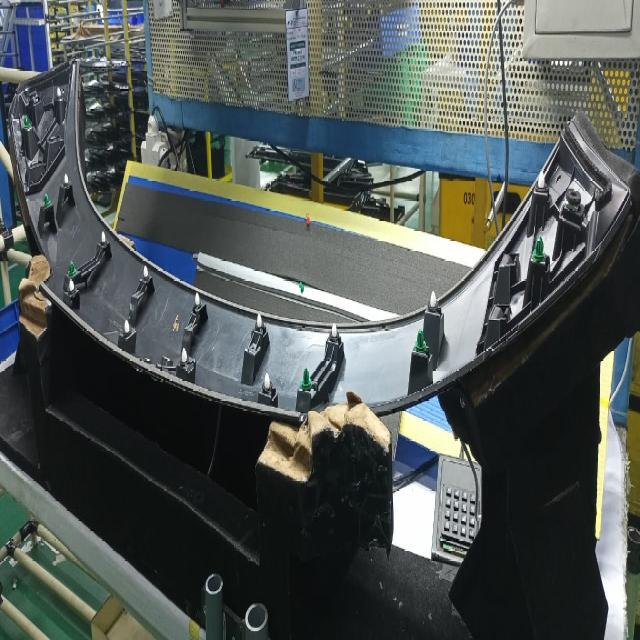

In [ ]:
image